## Singapore Housing Prediction based on Resales
<hr>
Prediction of housing prices has been a popular topic in data science. In this project, the housing prices are being predicted based on the historical resale data from the Singaporean government. <br>

 After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [9]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#machine learning
from sklearn.linear_model import LinearRegression

## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website. Data are collected from the period 1990 until now. The data online are divided into four seperate files, which we will merge in Python. Since the third file contains more than 20 mb of data, this file has been seperated into 2006 to 2012 and 2012 to 2014. This makes uploading the data on github possible.

In [2]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, the last data set contains 11 features instead of 10 if we compare with the other data sets. To check which feature is added to the last data set, we recall the variables of the first data sets and the variables of the last data set. 

In [8]:
#show features of data set 1
data1.head(5)

month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977          9000  
1            31.0        IMPROVED                 1977          6000  
2            31.0        IMPROVED                 1977          8000  
3            31.0        IMPROVED                 1977          6000  
4            73.0  NEW GENERATION                 1976         47200

In [7]:
#show features of data set 5
data5.head(5)

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986               70   
1            68.0  New Generation                 1981               65   
2            69.0  New Generation                 1980               64   
3            68.0  New Generation                 1979               63   
4            68.0  New Generation                 1980               64   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. 

In [10]:
#concatenate dataset
sets = [data1, data2, data3, data4]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (709998, 10)


## 2 Exploration of the Dataset
<hr>
To start exploring the data, the dataset are loaded. From the dataset, we can conclude the data contain 768.629 datapoints and 10 features. 

In [11]:
#load dataset
n = data.shape[0]
print('Number of training data =',n)
print(data.shape)

Number of training data = 709998
(709998, 10)


We use data.describe() to have a look at some key metrics of the data set.

In [12]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   709998.000000        709998.000000  7.099980e+05
mean        95.304043          1986.149789  2.693530e+05
std         26.366675             8.490931  1.345961e+05
min         28.000000          1966.000000  5.000000e+03
25%         70.000000          1980.000000  1.680000e+05
50%         93.000000          1985.000000  2.500000e+05
75%        115.000000          1992.000000  3.530000e+05
max        307.000000          2012.000000  1.088888e+06


We can conclude:
- All appartments vary between the size of 26.4 and 307 sqm. The median is 95.3 sqm.
- The oldest lease start date is 1996 and the oldest one is 2012. Thus no appartment in this list has a lease that expires before 2066. The mean lease start date is 1986. 
- Resale prices vary between 5000 SGD and 1.09 million SGD. It has to be verified if a price of 5000SGD is possible or is due to faulty data. The median price lies at 260k SGD.
- Overall, at a first glance the dataset seems to be clean and free of faulty datapoints. <br>

Let's have a look at the data types:

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709998 entries, 0 to 52202
Data columns (total 10 columns):
month                  709998 non-null object
town                   709998 non-null object
flat_type              709998 non-null object
block                  709998 non-null object
street_name            709998 non-null object
storey_range           709998 non-null object
floor_area_sqm         709998 non-null float64
flat_model             709998 non-null object
lease_commence_date    709998 non-null int64
resale_price           709998 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 59.6+ MB
None


We can see that the data list is complete, as all features have 709,998 values. <br>

After loading the data, the data are explored. Features are checked to see whether cleaning and preprocessing of the data is needed.

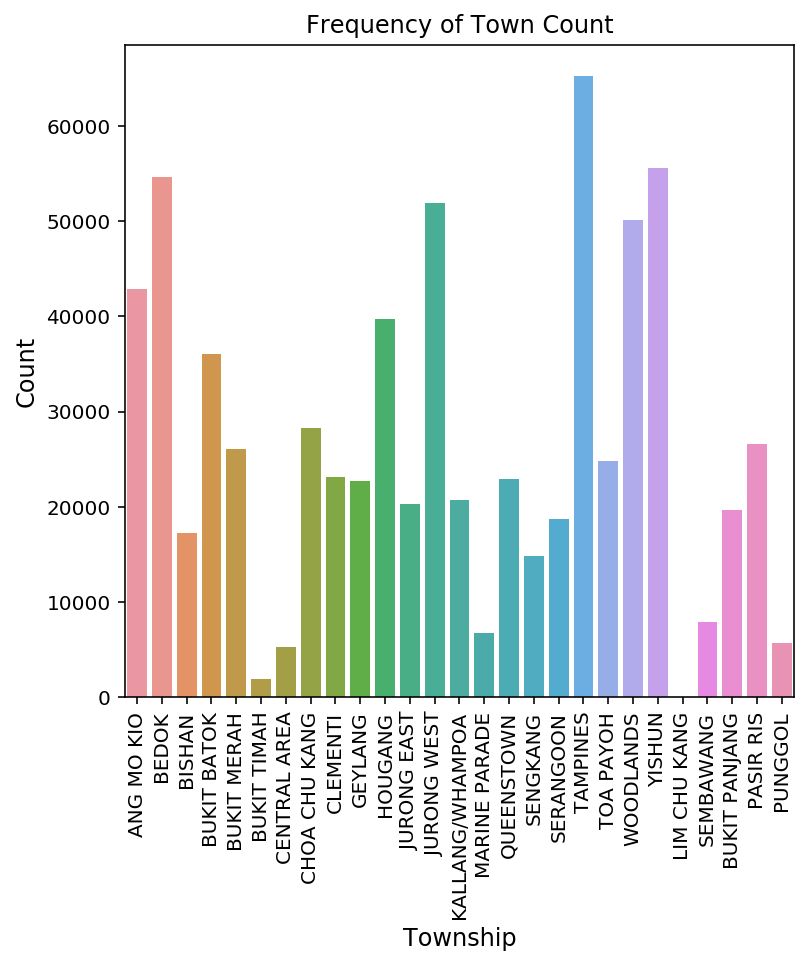

Town Count [('TAMPINES', 65225), ('YISHUN', 55537), ('BEDOK', 54685), ('JURONG WEST', 51871), ('WOODLANDS', 50129), ('ANG MO KIO', 42898), ('HOUGANG', 39731), ('BUKIT BATOK', 36015), ('CHOA CHU KANG', 28287), ('PASIR RIS', 26661), ('BUKIT MERAH', 26137), ('TOA PAYOH', 24830), ('CLEMENTI', 23114), ('QUEENSTOWN', 22977), ('GEYLANG', 22779), ('KALLANG/WHAMPOA', 20694), ('JURONG EAST', 20265), ('BUKIT PANJANG', 19647), ('SERANGOON', 18706), ('BISHAN', 17304), ('SENGKANG', 14876), ('SEMBAWANG', 7898), ('MARINE PARADE', 6718), ('PUNGGOL', 5667), ('CENTRAL AREA', 5305), ('BUKIT TIMAH', 1978), ('LIM CHU KANG', 64)]


In [32]:
#town count
plt.figure(1,figsize=(6,6))

towns = data['town'].unique()
sns.countplot(x="town", data=data , order = towns)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Township', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town Count", fontsize=12)
plt.show()
towns_count = Counter(data['town']).most_common()
print("Town Count " +str(towns_count))

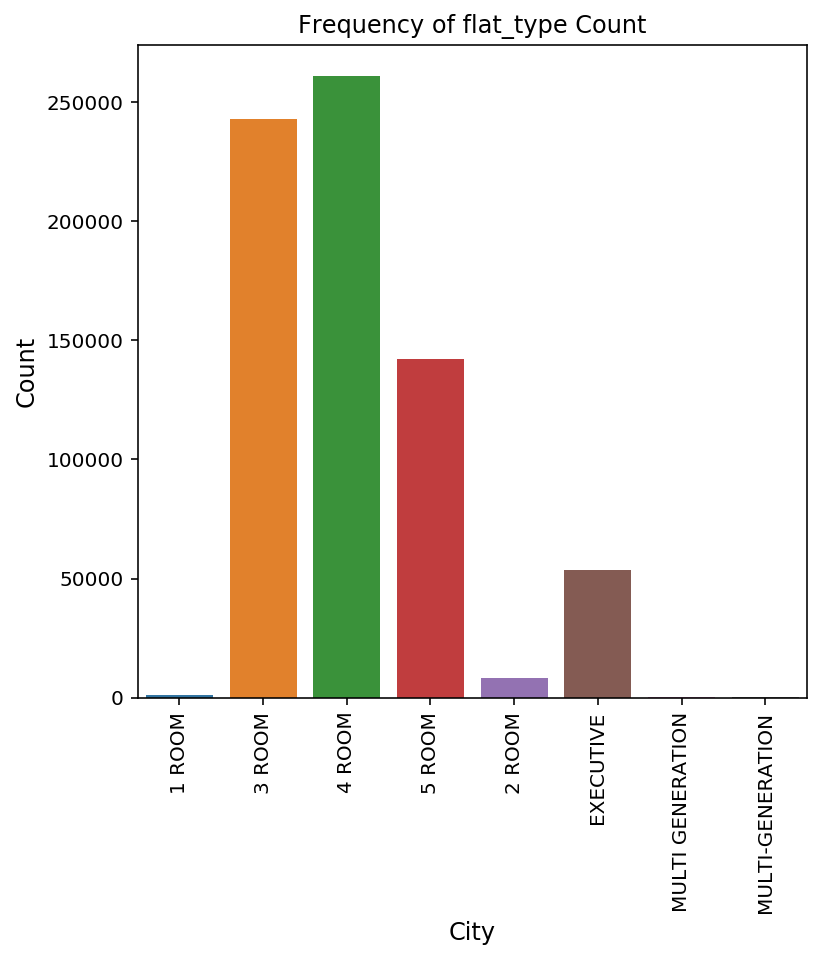

Flat_type Count [('4 ROOM', 260997), ('3 ROOM', 243144), ('5 ROOM', 142290), ('EXECUTIVE', 53610), ('2 ROOM', 8275), ('1 ROOM', 1222), ('MULTI GENERATION', 279), ('MULTI-GENERATION', 181)]


In [28]:
#flat_type count
plt.figure(2,figsize=(6,6))

flat_type = data['flat_type'].unique()
sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()
flat_type_count = Counter(data['flat_type']).most_common()
print("Flat_type Count " +str(flat_type_count))

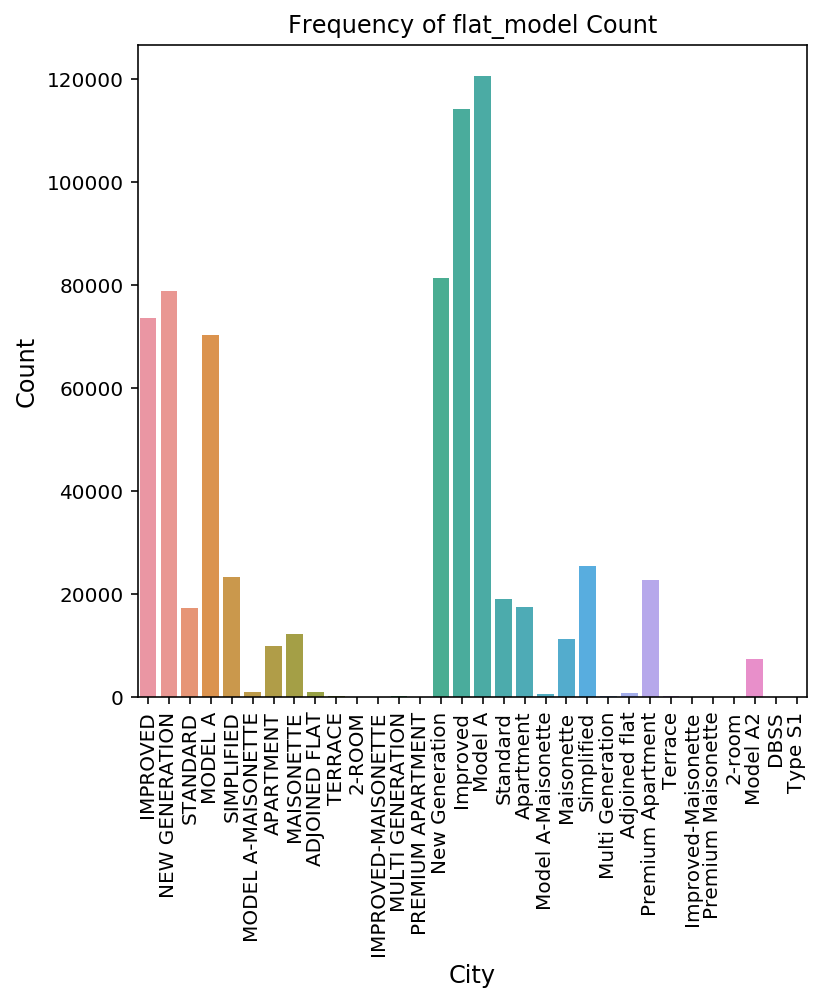

flat_model Count [('Model A', 120577), ('Improved', 114183), ('New Generation', 81283), ('NEW GENERATION', 78898), ('IMPROVED', 73593), ('MODEL A', 70381), ('Simplified', 25462), ('SIMPLIFIED', 23258), ('Premium Apartment', 22814), ('Standard', 19038), ('Apartment', 17424), ('STANDARD', 17375), ('MAISONETTE', 12215), ('Maisonette', 11282), ('APARTMENT', 9901), ('Model A2', 7488), ('MODEL A-MAISONETTE', 982), ('ADJOINED FLAT', 944), ('Adjoined flat', 885), ('Model A-Maisonette', 701), ('Terrace', 325), ('MULTI GENERATION', 279), ('TERRACE', 247), ('Multi Generation', 181), ('DBSS', 72), ('Premium Maisonette', 70), ('Improved-Maisonette', 52), ('IMPROVED-MAISONETTE', 44), ('2-ROOM', 21), ('2-room', 16), ('PREMIUM APARTMENT', 6), ('Type S1', 1)]


In [27]:
#flat_model count
plt.figure(3,figsize=(6,6))

flat_model = data['flat_model'].unique()
sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()
flat_model_count = Counter(data['flat_model']).most_common()
print("flat_model Count " +str(flat_model_count))

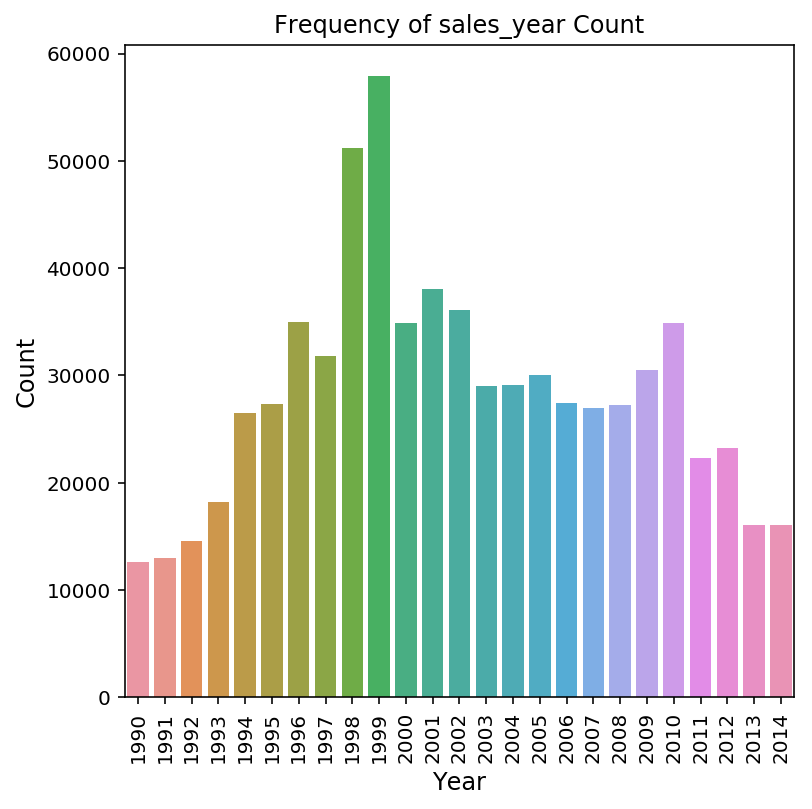

sales_year Count [(1999, 57906), (1998, 51201), (2001, 38055), (2002, 36098), (1996, 35014), (2000, 34862), (2010, 34854), (1997, 31815), (2009, 30482), (2005, 30045), (2004, 29112), (2003, 29003), (2006, 27427), (1995, 27368), (2008, 27262), (2007, 26982), (1994, 26474), (2012, 23198), (2011, 22281), (1993, 18193), (2013, 16097), (2014, 16096), (1992, 14607), (1991, 12954), (1990, 12612)]


In [26]:
#yearly sales trend
plt.figure(4,figsize=(6,6))

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count=pd.DatetimeIndex(data['month']).year.value_counts()
sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
plt.show()

sales_year_count = Counter(pd.DatetimeIndex(data['month']).year).most_common()
print("sales_year Count " +str(sales_year_count))

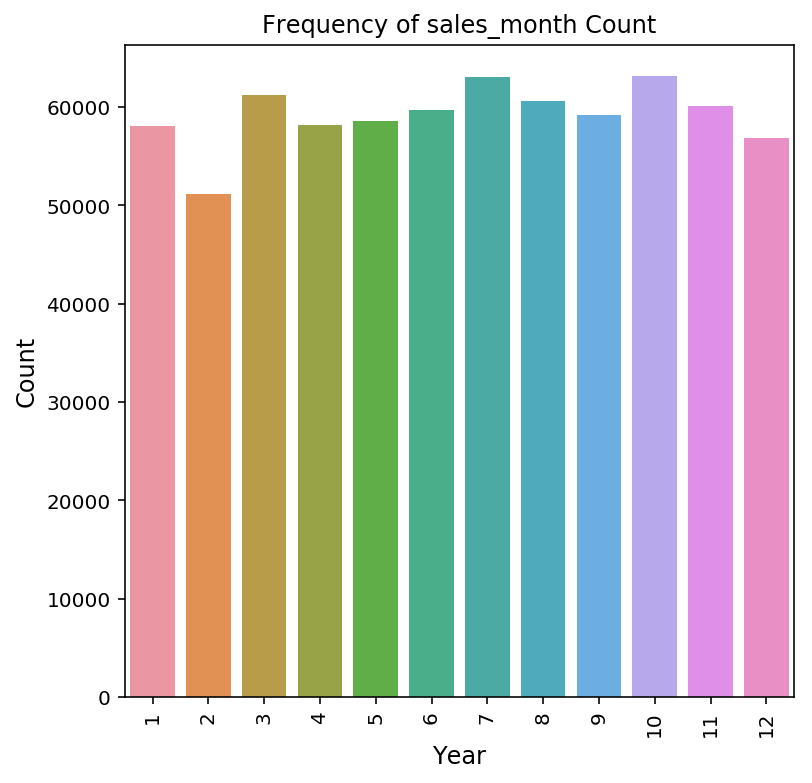

sales_month Count [(10, 63193), (7, 63056), (3, 61271), (8, 60606), (11, 60091), (6, 59671), (9, 59233), (5, 58582), (4, 58220), (1, 58069), (12, 56866), (2, 51140)]


In [25]:
#monthly sales trend
plt.figure(5,figsize=(6,6))

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
year_count=pd.DatetimeIndex(data['month']).month.value_counts()
sns.barplot(year_count.index, year_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month Count", fontsize=12)
plt.show()
sales_month_count = Counter(pd.DatetimeIndex(data['month']).month).most_common()
print("sales_month Count " +str(sales_month_count))

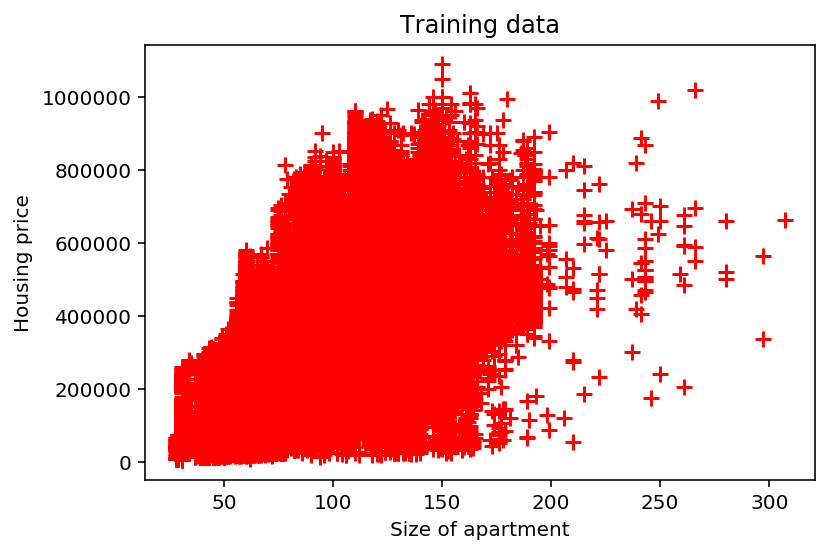

In [5]:
#scatterplot of one of the features
x1_train = data.iloc[:,6]
y_train = data.iloc[:,9]

plt.figure(1)
plt.scatter(x1_train, y_train, s=60, c='r', marker='+', label='Class0')
plt.title('Training data')
plt.xlabel('Size of apartment')
plt.ylabel('Housing price')
plt.show()

## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>


## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features.

## 5 Results
<hr>
Based on the analysis, the following results are derived:

## 6 Conclusion
<hr>
x